In [1]:
import pandas as pd

df= pd.read_csv("fraudTrain.csv")
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [3]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

is_fraud    count  percentage
0         0  1289169   99.421135
1         1     7506    0.578865

In [5]:
#Finiding unique values in each column
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [6]:
#  Converting data type of trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [7]:
# Derive 'Transaction Hour' Feature from 'Transaction Time' Feature
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int64

In [8]:
# Derive 'Day of Week' Feature from 'Transaction Time' Feature
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_of_week, Length: 1296675, dtype: object

In [9]:
# let's print top 5 rows from the dataset
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... city_pop  \
0    Banks      F                561 Perry Cove  ...     3495   
1     Gill      F  43039 Riley Greens Suite 393  ...      149   
2  Sanchez      M      594 White Dale Suite 530  ...     4154   
3    White      M   9443 Cynthia Court Apt. 038  ...     1939   
4   Garcia      M              408 Bradley Rest  ...       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_hour  day_of_week  
0        0          0      Tuesday  
1        0          0      Tuesday  
2        0          0      Tuesday  
3        0          0      Tuesday  
4        0          0      Tuesday  

[5 rows x 25 columns]

In [10]:
# Derive 'Year Month' Feature from 'Transaction Time' Feature
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1296670    2020-06
1296671    2020-06
1296672    2020-06
1296673    2020-06
1296674    2020-06
Name: year_month, Length: 1296675, dtype: period[M]

In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();


In [14]:
df.state.value_counts(normalize=True)

TX    0.073169
NY    0.064396
PA    0.061578
CA    0.043465
OH    0.035846
MI    0.035594
IL    0.033356
FL    0.032908
AL    0.031611
MO    0.029617
MN    0.024458
AR    0.024005
NC    0.023341
WI    0.022649
VA    0.022558
SC    0.022511
KY    0.021960
IN    0.021270
IA    0.020811
OK    0.020569
MD    0.020200
GA    0.020100
WV    0.019813
NJ    0.018974
NE    0.018638
KS    0.017735
MS    0.016340
LA    0.016168
WY    0.014901
WA    0.014594
OR    0.014342
TN    0.013538
ME    0.012729
NM    0.012653
ND    0.011403
CO    0.010704
MA    0.009544
SD    0.009504
VT    0.009076
MT    0.009065
AZ    0.008306
UT    0.008251
NH    0.006384
CT    0.005940
NV    0.004324
ID    0.004276
DC    0.002786
HI    0.001974
AK    0.001635
RI    0.000424
DE    0.000007
Name: state, dtype: float64

In [15]:
df.job.value_counts(normalize=True,ascending=False)

Film/video editor             0.007542
Exhibition designer           0.007094
Naval architect               0.006697
Surveyor, land/geomatics      0.006694
Materials engineer            0.006378
                                ...   
Information officer           0.000006
Veterinary surgeon            0.000006
Ship broker                   0.000005
Contracting civil engineer    0.000005
Warehouse manager             0.000005
Name: job, Length: 494, dtype: float64

In [16]:
import numpy as np
df['dob'] = pd.to_datetime(df['dob'])

df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

df['age'].describe()

count    1.296675e+06
mean     4.599986e+01
std      1.739626e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

In [17]:
##  Distribution of amt
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count              1.296675e+06                1.289169e+06   
1     mean              7.035104e+01                6.766711e+01   
2      std              1.603160e+02                1.540080e+02   
3      min              1.000000e+00                1.000000e+00   
4      50%              4.752000e+01                4.728000e+01   
5      95%              1.963100e+02                1.899000e+02   
6    99.9%              1.499254e+03                1.503696e+03   
7      max              2.894890e+04                2.894890e+04   

   Fraud Amt Distribution  
0             7506.000000  
1              531.320092  
2              390.560070  
3                1.060000  
4              396.505000  
5             1083.985000  
6             1291.038400  
7             1376.040000

In [18]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

In [19]:
# check outliers in graph
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box()
    plt.title(col)
plt.show()

In [20]:
# Year Month vs Number of Transactions
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

year_month  num_of_transactions  customers
0     2019-01                52525        913
1     2019-02                49866        918
2     2019-03                70939        916
3     2019-04                68078        913
4     2019-05                72532        910
5     2019-06                86064        908
6     2019-07                86596        910
7     2019-08                87359        911
8     2019-09                70652        913
9     2019-10                68758        912
10    2019-11                70421        911
11    2019-12               141060        916
12    2020-01                52202        911
13    2020-02                47791        909
14    2020-03                72850        912
15    2020-04                66892        914
16    2020-05                74343        915
17    2020-06                57747        910

In [21]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

In [22]:
## Year Month vs Number of Customers Done the Transactions
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [23]:
## Fraud Transactions
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

year_month  num_of_fraud_transactions  fraud_customers
0     2019-01                        506               50
1     2019-02                        517               53
2     2019-03                        494               49
3     2019-04                        376               41
4     2019-05                        408               42
5     2019-06                        354               35
6     2019-07                        331               36
7     2019-08                        382               39
8     2019-09                        418               44
9     2019-10                        454               50
10    2019-11                        388               41
11    2019-12                        592               62
12    2020-01                        343               40
13    2020-02                        336               35
14    2020-03                        444               45
15    2020-04                        302               36
16    2020-05                        527               54
17    2020-06                        334               36

In [24]:
print(df_timeline02['num_of_fraud_transactions'].mean())

417.0


In [25]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

In [26]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [27]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

Gender  gender_count    percent
0      F        709863  54.744867
1      M        586812  45.255133

In [28]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [29]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

Gender  is_fraud   count  gender_count  percent_grp
0      F         0  706128        709863    99.473842
1      F         1    3735        709863     0.526158
2      M         0  583041        586812    99.357375
3      M         1    3771        586812     0.642625

In [30]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

Category  category_count    percent
2    gas_transport          131659  10.153585
4      grocery_pos          123638   9.535003
6             home          123115   9.494669
12    shopping_pos          116672   8.997783
7        kids_pets          113035   8.717296
11    shopping_net           97543   7.522548
0    entertainment           94014   7.250390
1      food_dining           91461   7.053502
10   personal_care           90758   6.999287
5   health_fitness           85879   6.623017
9         misc_pos           79655   6.143020
8         misc_net           63287   4.880714
3      grocery_net           45452   3.505273
13          travel           40507   3.123913

In [31]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

index        Category  category_count    percent
0       2   gas_transport          131659  10.153585
1       4     grocery_pos          123638   9.535003
2       6            home          123115   9.494669
3      12    shopping_pos          116672   8.997783
4       7       kids_pets          113035   8.717296
5      11    shopping_net           97543   7.522548
6       0   entertainment           94014   7.250390
7       1     food_dining           91461   7.053502
8      10   personal_care           90758   6.999287
9       5  health_fitness           85879   6.623017
10      9        misc_pos           79655   6.143020
11      8        misc_net           63287   4.880714
12      3     grocery_net           45452   3.505273
13     13          travel           40507   3.123913

In [32]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [33]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100


In [34]:
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

Category  is_fraud   count  category_count    percent  percent_grp
4    gas_transport         0  131041          131659  10.153585    99.530606
5    gas_transport         1     618          131659  10.153585     0.469394
8      grocery_pos         0  121895          123638   9.535003    98.590239
9      grocery_pos         1    1743          123638   9.535003     1.409761
13            home         1     198          123115   9.494669     0.160825
12            home         0  122917          123115   9.494669    99.839175
25    shopping_pos         1     843          116672   8.997783     0.722538
24    shopping_pos         0  115829          116672   8.997783    99.277462
14       kids_pets         0  112796          113035   8.717296    99.788561
15       kids_pets         1     239          113035   8.717296     0.211439
23    shopping_net         1    1713           97543   7.522548     1.756149
22    shopping_net         0   95830           97543   7.522548    98.243851
1    entertainment         1     233           94014   7.250390     0.247835
0    entertainment         0   93781           94014   7.250390    99.752165
3      food_dining         1     151           91461   7.053502     0.165098
2      food_dining         0   91310           91461   7.053502    99.834902
20   personal_care         0   90538           90758   6.999287    99.757597
21   personal_care         1     220           90758   6.999287     0.242403
11  health_fitness         1     133           85879   6.623017     0.154869
10  health_fitness         0   85746           85879   6.623017    99.845131
18        misc_pos         0   79405           79655   6.143020    99.686147
19        misc_pos         1     250           79655   6.143020     0.313853
16        misc_net         0   62372           63287   4.880714    98.554205
17        misc_net         1     915           63287   4.880714     1.445795
7      grocery_net         1     134           45452   3.505273     0.294817
6      grocery_net         0   45318           45452   3.505273    99.705183
26          travel         0   40391           40507   3.123913    99.713630
27          travel         1     116           40507   3.123913     0.286370

In [35]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

Category  is_fraud  count  category_count    percent  percent_grp
11  health_fitness         1    133           85879   6.623017     0.154869
13            home         1    198          123115   9.494669     0.160825
3      food_dining         1    151           91461   7.053502     0.165098
15       kids_pets         1    239          113035   8.717296     0.211439
21   personal_care         1    220           90758   6.999287     0.242403
1    entertainment         1    233           94014   7.250390     0.247835
27          travel         1    116           40507   3.123913     0.286370
7      grocery_net         1    134           45452   3.505273     0.294817
19        misc_pos         1    250           79655   6.143020     0.313853
5    gas_transport         1    618          131659  10.153585     0.469394
25    shopping_pos         1    843          116672   8.997783     0.722538
9      grocery_pos         1   1743          123638   9.535003     1.409761
17        misc_net         1    915           63287   4.880714     1.445795
23    shopping_net         1   1713           97543   7.522548     1.756149

In [36]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [37]:
df.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                       0.003396
fraud_Cormier LLC                       0.002814
fraud_Schumm PLC                        0.002803
fraud_Kuhn LLC                          0.002707
fraud_Boyer PLC                         0.002694
                                          ...   
fraud_Douglas, DuBuque and McKenzie     0.000598
fraud_Treutel-King                      0.000598
fraud_Medhurst, Labadie and Gottlieb    0.000585
fraud_Reichert-Weissnat                 0.000581
fraud_Hahn, Douglas and Schowalter      0.000561
Name: merchant, Length: 693, dtype: float64

In [38]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

Merchant  merchant_count   percent
316                     fraud_Kilback LLC            4403  0.339561
105                     fraud_Cormier LLC            3649  0.281412
571                      fraud_Schumm PLC            3634  0.280255
349                        fraud_Kuhn LLC            3510  0.270692
70                        fraud_Boyer PLC            3493  0.269381
..                                    ...             ...       ...
633                    fraud_Treutel-King             775  0.059768
143   fraud_Douglas, DuBuque and McKenzie             775  0.059768
423  fraud_Medhurst, Labadie and Gottlieb             759  0.058534
505               fraud_Reichert-Weissnat             753  0.058072
221    fraud_Hahn, Douglas and Schowalter             727  0.056066

[693 rows x 3 columns]

In [39]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [40]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

Merchant  is_fraud  count  merchant_count  \
672                     fraud_Kozey-Boehm         1     48            1866   
489     fraud_Herman, Treutel and Dickens         1     33            1300   
606                 fraud_Kerluke-Abshire         1     41            1838   
159                       fraud_Brown PLC         1     26            1176   
400                     fraud_Goyette Inc         1     42            1943   
...                                   ...       ...    ...             ...   
91                      fraud_Berge-Hills         1      1            2284   
1106                 fraud_Schmidt-Larkin         1      1            2381   
973   fraud_Prosacco, Kreiger and Kovacek         1      1            2440   
83                   fraud_Beier and Sons         1      1            2473   
311                fraud_Eichmann-Kilback         1      1            2554   

       percent  percent_grp  
672   0.143907     2.572347  
489   0.100256     2.538462  
606   0.141747     2.230686  
159   0.090694     2.210884  
400   0.149845     2.161606  
...        ...          ...  
91    0.176143     0.043783  
1106  0.183623     0.041999  
973   0.188174     0.040984  
83    0.190719     0.040437  
311   0.196965     0.039154  

[679 rows x 6 columns]

In [41]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [42]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)
df1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... category_shopping_net  \
0    Banks      F                561 Perry Cove  ...                     0   
1     Gill      F  43039 Riley Greens Suite 393  ...                     0   
2  Sanchez      M      594 White Dale Suite 530  ...                     0   
3    White      M   9443 Cynthia Court Apt. 038  ...                     0   
4   Garcia      M              408 Bradley Rest  ...                     0   

  category_shopping_pos  category_travel  gender_M  week_Monday  \
0                     0                0         0            0   
1                     0                0         0            0   
2                     0                0         1            0   
3                     0                0         1            0   
4                     0                0         1            0   

   week_Saturday week_Sunday week_Thursday week_Tuesday  week_Wednesday  
0              0           0             0            1               0  
1              0           0             0            1               0  
2              0           0             0            1               0  
3              0           0             0            1               0  
4              0           0             0            1               0  

[5 rows x 47 columns]

In [43]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [44]:
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [45]:
df1['dist'].describe()

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: dist, dtype: float64

In [46]:
df1.dtypes

Unnamed: 0                          int64
trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                        

In [47]:
df1.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_hour', 'day_of_week',
       'year_month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist'],
      dtype='object')

In [48]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
time_index                                                                
2019-01-01 00:00:18           0   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44           1   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51           2   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16           3   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06           4   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt      first     last gender  \
time_index                                               
2019-01-01 00:00:18    4.97   Jennifer    Banks      F   
2019-01-01 00:00:44  107.23  Stephanie     Gill      F   
2019-01-01 00:00:51  220.11     Edward  Sanchez      M   
2019-01-01 00:01:16   45.00     Jeremy    White      M   
2019-01-01 00:03:06   41.96      Tyler   Garcia      M   

                                           street  ... category_shopping_pos  \
time_index                                         ...                         
2019-01-01 00:00:18                561 Perry Cove  ...                     0   
2019-01-01 00:00:44  43039 Riley Greens Suite 393  ...                     0   
2019-01-01 00:00:51      594 White Dale Suite 530  ...                     0   
2019-01-01 00:01:16   9443 Cynthia Court Apt. 038  ...                     0   
2019-01-01 00:03:06              408 Bradley Rest  ...                     0   

                    category_travel  gender_M  week_Monday  week_Saturday  \
time_index                                                                  
2019-01-01 00:00:18               0         0            0              0   
2019-01-01 00:00:44               0         0            0              0   
2019-01-01 00:00:51               0         1            0              0   
2019-01-01 00:01:16               0         1            0              0   
2019-01-01 00:03:06               0         1            0              0   

                     week_Sunday week_Thursday week_Tuesday week_Wednesday  \
time_index                                                                   
2019-01-01 00:00:18            0             0            1              0   
2019-01-01 00:00:44            0             0            1              0   
2019-01-01 00:00:51            0             0            1              0   
2019-01-01 00:01:16            0             0            1              0   
2019-01-01 00:03:06            0             0            1              0   

                           dist  
time_index                       
2019-01-01 00:00:18   78.597568  
2019-01-01 00:00:44   30.212176  
2019-01-01 00:00:51  108.206083  
2019-01-01 00:01:16   95.673231  
2019-01-01 00:03:06   77.556744  

[5 rows x 48 columns]

In [49]:
df1['val_for_agg'] = 1

In [50]:
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [51]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [52]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [53]:
df_hist_trans_60d.head()

cc_num  trans_date  hist_trans_60d
0  60416207185  2019-01-01             0.0
1  60416207185  2019-01-02             1.0
2  60416207185  2019-01-03             5.0
3  60416207185  2019-01-04             7.0
4  60416207185  2019-01-05             9.0

In [54]:
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [55]:
df_hist_orders_24h.head()

cc_num trans_date_trans_time  hist_trans_24h
0  60416207185   2019-01-01 12:47:15             0.0
1  60416207185   2019-01-02 08:44:57             1.0
2  60416207185   2019-01-02 08:47:36             2.0
3  60416207185   2019-01-02 12:38:14             3.0
4  60416207185   2019-01-02 13:10:46             4.0

In [56]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [57]:
df_hist_fraud_trans_24h.head()

cc_num trans_date_trans_time  hist_fraud_trans_24h
0  60416207185   2019-03-01 01:32:53                   0.0
1  60416207185   2019-03-01 02:42:25                   1.0
2  60416207185   2019-03-01 23:06:58                   2.0
3  60416207185   2019-03-02 22:10:38                   3.0
4  60416207185   2019-03-02 22:10:59                   2.0

In [58]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [59]:
df_hist_fraud_trans_2h.head()

cc_num trans_date_trans_time  hist_fraud_trans_2h
0  60416207185   2019-03-01 01:32:53                  0.0
1  60416207185   2019-03-01 02:42:25                  1.0
2  60416207185   2019-03-01 23:06:58                  2.0
3  60416207185   2019-03-02 22:10:38                  1.0
4  60416207185   2019-03-02 22:10:59                  1.0

In [60]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [61]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [62]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [63]:
df_hist_trans_amt_avg_60d.head(10)

cc_num  trans_date  hist_trans_avg_amt_60d
0  60416207185  2019-01-01                0.000000
1  60416207185  2019-01-02                7.270000
2  60416207185  2019-01-03               35.188333
3  60416207185  2019-01-04               31.365714
4  60416207185  2019-01-05               40.378889
5  60416207185  2019-01-06               43.053636
6  60416207185  2019-01-07               48.005000
7  60416207185  2019-01-08               60.016154
8  60416207185  2019-01-09               70.423125
9  60416207185  2019-01-10               69.753889

In [64]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [65]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [66]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [67]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [68]:
df2.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... week_Tuesday  \
0    Banks      F                561 Perry Cove  ...            1   
1     Gill      F  43039 Riley Greens Suite 393  ...            1   
2  Sanchez      M      594 White Dale Suite 530  ...            1   
3    White      M   9443 Cynthia Court Apt. 038  ...            1   
4   Garcia      M              408 Bradley Rest  ...            1   

  week_Wednesday        dist  val_for_agg  trans_date  hist_trans_60d  \
0              0   78.597568            1  2019-01-01             1.0   
1              0   30.212176            1  2019-01-01             1.0   
2              0  108.206083            1  2019-01-01             8.0   
3              0   95.673231            1  2019-01-01             1.0   
4              0   77.556744            1  2019-01-01             1.0   

  hist_trans_24h hist_fraud_trans_24h hist_fraud_trans_2h  \
0            5.0                  0.0                 0.0   
1            2.0                  0.0                 0.0   
2            5.0                  0.0                 0.0   
3            6.0                  0.0                 0.0   
4            4.0                  0.0                 0.0   

   hist_trans_avg_amt_60d  
0                4.970000  
1               47.737903  
2              377.925000  
3               45.000000  
4               41.960000  

[5 rows x 55 columns]

In [69]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [70]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [71]:
corr = df2[cols].corr()
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

In [72]:
# Select Features
feature = df2[cols].drop('is_fraud', axis=1)

# Select Target
target = df2[cols]['is_fraud']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)


Shape of training feature: (1037372, 29)
Shape of testing feature: (259343, 29)
Shape of training label: (1037372,)
Shape of training label: (259343,)


In [74]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [75]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.9994794538506919
Precision: 0.9561231172233137
Recall: 0.9554973821989529
F1 Score: 0.955810147299509
Cohens Kappa Score: 0.9555483321924857
Area Under Curve: 0.9776187529655431
Confusion Matrix:
 [[257748     67]
 [    68   1460]]


In [77]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [78]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9996259779519786
Precision: 0.9986062717770035
Recall: 0.93782722513089
F1 Score: 0.9672629092136347
Cohens Kappa Score: 0.9670750101051577
Area Under Curve: 0.9941855693127089
Confusion Matrix:
 [[257813      2]
 [    95   1433]]


In [79]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [81]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.9886559498424866
Precision: 0.2575445816186557
Recall: 0.49149214659685864
F1 Score: 0.33798379837983794
Cohens Kappa Score: 0.33282519753805784
Area Under Curve: 0.8953203119185366
Confusion Matrix:
 [[255650   2165]
 [   777    751]]


In [82]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9951685605549407
Precision: 0.6515986769570011
Recall: 0.3867801047120419
F1 Score: 0.4854209445585215
Cohens Kappa Score: 0.48315238777032976
Area Under Curve: 0.8607154359943759
Confusion Matrix:
 [[257499    316]
 [   937    591]]


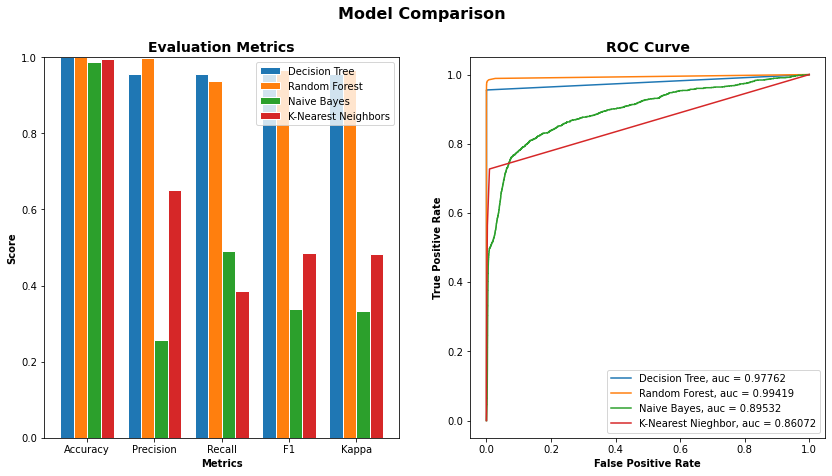

In [84]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [86]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 54.2min


KeyboardInterrupt: 

In [ ]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))